In [1]:
data_dir = '2021_10_06_test_data'
files = glob.glob(os.path.join(data_dir,'*.FIT'))

In [2]:
import datetime as dt

In [6]:
date = []
for f in files:
    header = fits.getheader(f)
    date_obs = header['DATE-OBS']
    date.append(dt.datetime.fromisoformat(date_obs,))

In [10]:
srt = np.argsort(date)

In [ ]:
# Image are shown North-left, East-down
# On the Lab computers these are seen North-left East-up

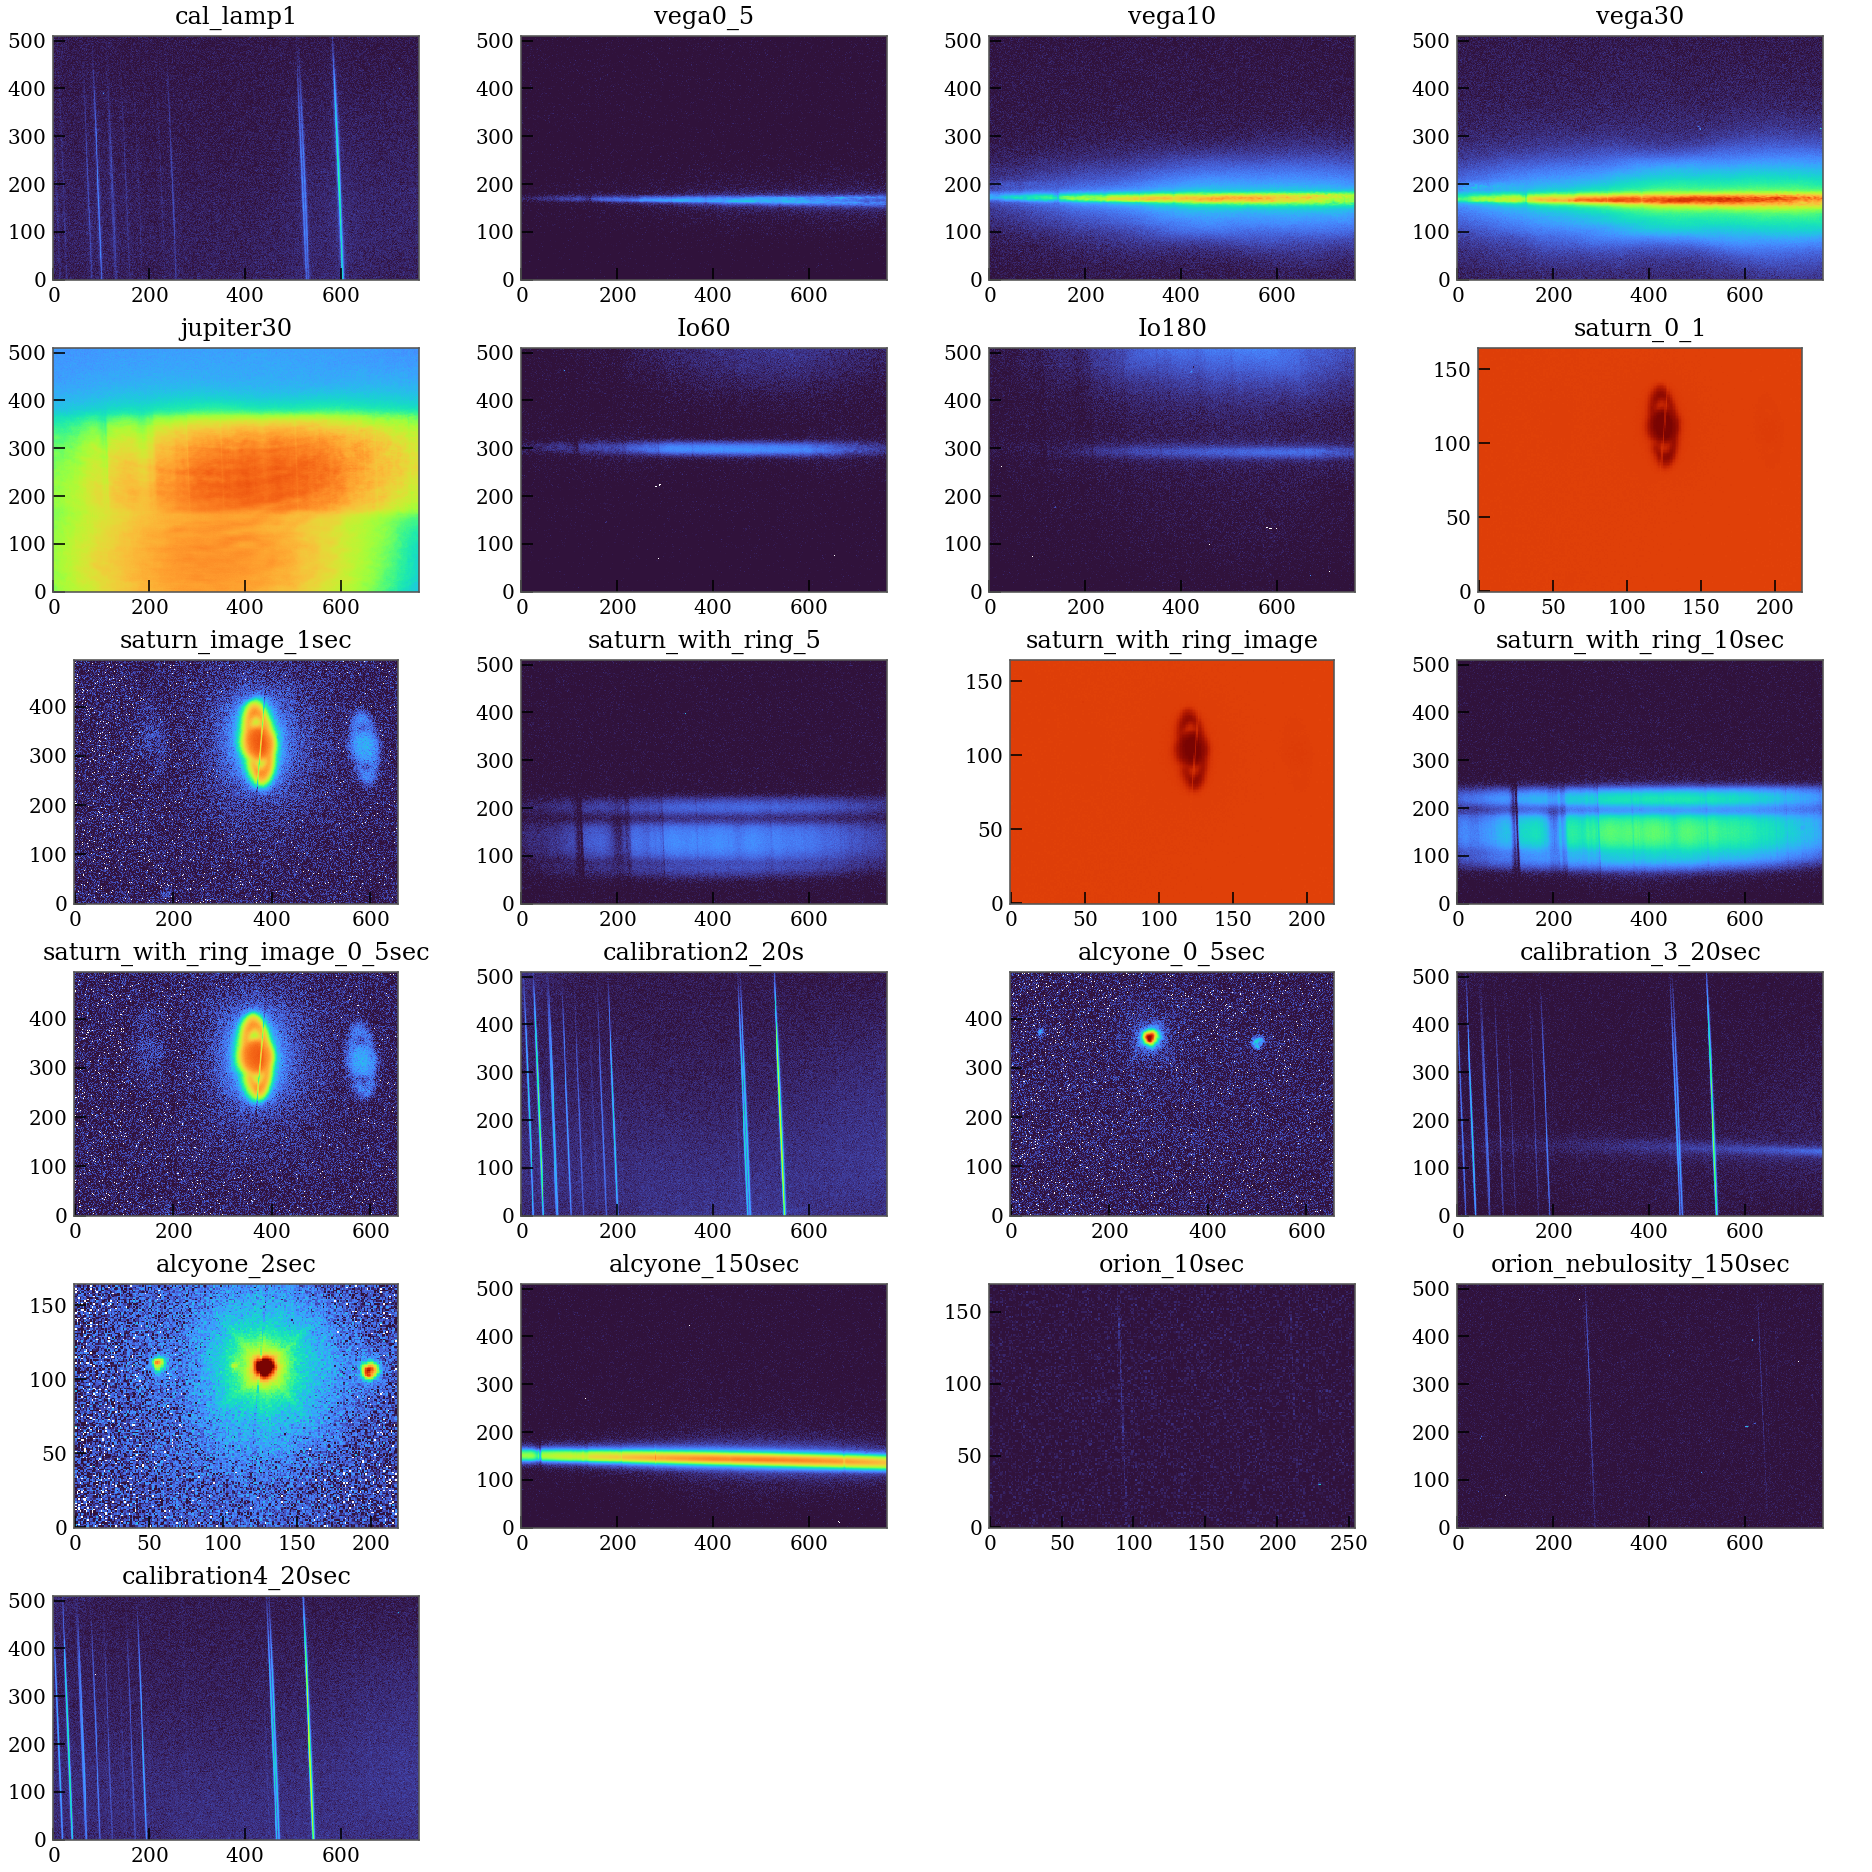

In [30]:
fig, axs = plt.subplots(int(len(files)/4 + 1),4,figsize=(13,13))
for i,f in enumerate(srt):
    f = files[f]
    with fits.open(f) as hdu:
        axs.flat[i].imshow(hdu[0].data,cmap='turbo',norm=mpl.colors.LogNorm(vmin=100,vmax=65000/2))
        axs.flat[i].set_title(os.path.basename(f)[:-4])
for ax in axs.flat[i+1:]:
    plt.delaxes(ax)

In [25]:
for s in srt:
    f = files[s]
    header = fits.getheader(f)
    obj = header['OBJECT'].strip().lower()
    if obj == 'cal':
        cal = f
    elif not ('image' in f):
        print(cal,f)

2021_10_06_test_data/cal_lamp1.FIT 2021_10_06_test_data/vega0_5.FIT
2021_10_06_test_data/cal_lamp1.FIT 2021_10_06_test_data/vega10.FIT
2021_10_06_test_data/cal_lamp1.FIT 2021_10_06_test_data/vega30.FIT
2021_10_06_test_data/cal_lamp1.FIT 2021_10_06_test_data/jupiter30.FIT
2021_10_06_test_data/cal_lamp1.FIT 2021_10_06_test_data/Io60.FIT
2021_10_06_test_data/cal_lamp1.FIT 2021_10_06_test_data/Io180.FIT
2021_10_06_test_data/cal_lamp1.FIT 2021_10_06_test_data/saturn_0_1.FIT
2021_10_06_test_data/cal_lamp1.FIT 2021_10_06_test_data/saturn_with_ring_5.FIT
2021_10_06_test_data/cal_lamp1.FIT 2021_10_06_test_data/saturn_with_ring_10sec.FIT
2021_10_06_test_data/calibration2_20s.FIT 2021_10_06_test_data/alcyone_0_5sec.FIT
2021_10_06_test_data/calibration_3_20sec.FIT 2021_10_06_test_data/alcyone_2sec.FIT
2021_10_06_test_data/calibration_3_20sec.FIT 2021_10_06_test_data/alcyone_150sec.FIT
2021_10_06_test_data/calibration_3_20sec.FIT 2021_10_06_test_data/orion_10sec.FIT
2021_10_06_test_data/calibration

In [1]:
with open('2021_10_06_test_data/cal_lamp1.FIT','rb') as f:
    line = f.read(80)
    while line.strip()!=b'END':
        print(line)
        line = f.read(80)

b'SIMPLE  =                    T /                                                '
b'BITPIX  =                   16 /                                                '
b'NAXIS   =                    2 /                                                '
b'NAXIS1  =                  765 /                                                '
b'NAXIS2  =                  510 /                                                '
b"OBJECT  = 'cal     '           /                                                "
b"TELESCOP= 'Unknown Telescope'                                                   "
b"INSTRUME= 'SBIG ST-7'                                                           "
b"OBSERVER= 'Observer's Name'                                                     "
b"DATE-OBS= '2021-10-07T01:27:06.000' / GMT START OF EXPOSURE [WIN]               "
b'BZERO   = +3.276800000000E+004 /                                                '
b'BSCALE  = +1.000000000000E+000 /                                          

In [3]:
with open('2021_10_06_test_data/saturn_with_ring_image.FIT','rb') as f:
    line = f.read(80)
    while line.strip()!=b'END':
        print(line)
        line = f.read(80)

b'SIMPLE  =                    T /                                                '
b'BITPIX  =                   16 /                                                '
b'NAXIS   =                    2 /                                                '
b'NAXIS1  =                  219 /                                                '
b'NAXIS2  =                  165 /                                                '
b"OBJECT  = 'saturn  '           /                                                "
b"TELESCOP= 'Unknown Telescope'                                                   "
b"INSTRUME= 'SBIG ST-7'                                                           "
b"OBSERVER= 'Observer's Name'                                                     "
b"DATE-OBS= '2021-10-07T03:31:30.000' / GMT START OF EXPOSURE [WIN]               "
b'BZERO   = +3.276800000000E+004 /                                                '
b'BSCALE  = +1.000000000000E+000 /                                          

In [100]:
%timeit getheader_val('2021_10_06_test_data/cal_lamp1.FIT','DATE-OBS')
header = fits.getheader('2021_10_06_test_data/cal_lamp1.FIT')
%timeit header['DATE-OBS']

29.2 µs ± 731 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
8.32 µs ± 544 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
